In [44]:
import pandas as pd  
import numpy as np  
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline



In [45]:
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_gcfp.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983,2.176,5.882,1.739,1.791,3.951,1.065,1.939,2.021,12.456,1.078,1.784,Pos - Late
1,R49#03,1.000,2.921,0.824,8.279,5.255,3.925,2.138,9.256,2.860,9.868,1.633,1.640,Pos - Late
2,R49#04,1.304,2.654,1.484,11.073,2.456,9.750,1.851,3.670,3.945,11.615,2.026,1.569,Pos - Late
3,R49#11,0.951,1.917,1.394,1.197,1.415,2.359,1.012,1.321,1.372,4.370,0.999,1.309,Pos - Early Conv
4,R49#12,1.117,2.437,2.284,1.397,1.374,1.933,1.233,1.518,1.648,10.358,1.231,1.623,Pos - Early Conv


In [46]:
#create a new column in DF and populate with "Neg"
#then alter to Pos for any 'Diag' column values that are not equal to "Neg" (various positive states)
df['bin_diag'] = "Neg"
df.loc[df['Diag']!="Neg", 'bin_diag'] = "Pos"


In [47]:
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag,bin_diag
0,R49#02,1.983,2.176,5.882,1.739,1.791,3.951,1.065,1.939,2.021,12.456,1.078,1.784,Pos - Late,Pos
1,R49#03,1.000,2.921,0.824,8.279,5.255,3.925,2.138,9.256,2.860,9.868,1.633,1.640,Pos - Late,Pos
2,R49#04,1.304,2.654,1.484,11.073,2.456,9.750,1.851,3.670,3.945,11.615,2.026,1.569,Pos - Late,Pos
3,R49#11,0.951,1.917,1.394,1.197,1.415,2.359,1.012,1.321,1.372,4.370,0.999,1.309,Pos - Early Conv,Pos
4,R49#12,1.117,2.437,2.284,1.397,1.374,1.933,1.233,1.518,1.648,10.358,1.231,1.623,Pos - Early Conv,Pos


In [48]:
#df['Diag'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        64 non-null     object 
 1   P100      64 non-null     float64
 2   P41       64 non-null     float64
 3   OspC      64 non-null     float64
 4   DbpA      64 non-null     float64
 5   BmpA      64 non-null     float64
 6   DbpB      64 non-null     float64
 7   P45       64 non-null     float64
 8   P58       64 non-null     float64
 9   P66       64 non-null     float64
 10  VlsE      64 non-null     float64
 11  ErpL      64 non-null     float64
 12  OspD      64 non-null     float64
 13  Diag      64 non-null     object 
 14  bin_diag  64 non-null     object 
dtypes: float64(12), object(3)
memory usage: 7.6+ KB


In [49]:
df.columns
#df.dtypes

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag', 'bin_diag'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
#X = df.drop(['Diag','ID'], axis=1)  
#X = df.filter(['VlsE', 'DbpA', 'P58', 'OspC','ErpL','DbpB'],axis=1)  
X = df.filter(['VlsE', 'DbpA', 'P58', 'OspC','ErpL','P66'],axis=1)  

#Data Standardization gives the data zero mean and unit variance, it is considered good practice, 
#especially for algorithms such as KNN which is based on the distance of data points
#however, there is some disagreement about it for logistic regression...may require testing for specific dataset results
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
y = df['bin_diag']
#split original dataset into training and testing subsets
#stratify=y ensures that the sampled sets attempt to represent each class's proportions as they were in the full set
#the 'y' does not mean 'yes' it is the y vectors of class labels
#note, random_state provides specific seed for pseudorandom generator to allow reproducible analysis of the model
#remove this parameter to allow random selection each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#the hyperparameters being fed to the gridsearch in this case may include some that are not 
#applicable with each other. Invocations with those may raise warnings that should be able to be ignored
#but to the degree practicable, feed compatible parameters together...

#we define the set of parameter values that will be passed in as "param_grid"
#max_iter is set very high due to non convergence errors that had been occurring. This can be revisited as data set 
#continues to grow
param_grid = [{'C': [.1,1,2.5,5], 'penalty': ['none','l2'],'solver': ['lbfgs','newton-cg', 'sag'], 'max_iter':[8000]},             
             {'C': [.1,1,2.5,5], 'penalty': ['none','l1','l2','elasticnet'],'solver': ['saga'], 'max_iter':[8000]},
              {'C': [.1,1,2.5,5], 'penalty': ['l1','l2'],'solver': ['liblinear'], 'max_iter':[2000]}]

logreg=LogisticRegression()
#this code implements the grid search
grid = GridSearchCV(logreg,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...C=0.1, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarni

[CV] END C=0.1, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarni

[CV] END .....C=0.1, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.1, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=80

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarni

[CV] END C=2.5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=2.5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=2.5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=2.5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=2.5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=2.5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=2.5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=2.5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=2.5, max_iter=8000, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=2.5, max_iter=8000, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=2.5, max_iter=8000, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=2.5, max_iter=8000, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=2.5, max_iter=8000, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=5, max_iter=

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarni

[CV] END .....C=5, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, max_iter=8000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=5, max_iter=8000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=8000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=8000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=5, max_i

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.1, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.1, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1;

[CV] END ......C=0.1, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=1, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

[CV] END ....C=2.5, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=2.5, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=2.5, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=2.5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=2.5, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2.5, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2.5, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2.5, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2.5, max_

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

[CV] END ......C=5, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, max_iter=8000, penalty=none, solver=saga; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=5, max_iter=8000, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=8000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, max_iter=8000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=5, max_iter=8000,

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 2.5, 5], 'max_iter': [8000],
                          'penalty': ['none', 'l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag']},
                         {'C': [0.1, 1, 2.5, 5], 'max_iter': [8000],
                          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                          'solver': ['saga']},
                         {'C': [0.1, 1, 2.5, 5], 'max_iter': [2000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             verbose=2)

In [52]:
print(grid.best_estimator_.penalty)

none


In [53]:
#from sklearn.model_selection import cross_val_score
print(grid.best_estimator_.get_params())



{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 8000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [54]:
model = grid.best_estimator_
#following lines are not needed as gridsearchCV does 'refit' (retrains best estimator on full set provided[the whole
#training set in this case]) by default
#model.set_params(max_iter=5000)
#model.fit(X_train, y_train)

yhat = model.predict(X_test)
print('Predicted Classes:')
print(yhat)
print('Actual Classes:')
print(y_test)

score = model.score(X_test,y_test)
# report the model performance
print('Accuracy: %.3f ' % (score))

Predicted Classes:
['Pos' 'Pos' 'Neg' 'Pos' 'Neg' 'Neg' 'Pos' 'Pos' 'Neg' 'Pos' 'Pos' 'Neg'
 'Pos' 'Neg' 'Pos' 'Neg']
Actual Classes:
26    Neg
34    Pos
54    Neg
35    Pos
31    Neg
18    Neg
19    Neg
47    Pos
50    Pos
11    Pos
49    Pos
62    Neg
38    Pos
22    Neg
51    Pos
30    Neg
Name: bin_diag, dtype: object
Accuracy: 0.812 


In [55]:
# predict probabilities with a multinomial logistic regression model
from sklearn.datasets import make_classification
# predict a multinomial probability distribution
yprobs = model.predict_proba(X_test)
# summarize the predicted probabilities
print('Predicted Probabilities:')
print(yprobs)

Predicted Probabilities:
[[1.12900812e-01 8.87099188e-01]
 [4.04304777e-05 9.99959570e-01]
 [9.73793407e-01 2.62065930e-02]
 [0.00000000e+00 1.00000000e+00]
 [9.97889870e-01 2.11013006e-03]
 [9.95991571e-01 4.00842876e-03]
 [4.38207965e-01 5.61792035e-01]
 [1.54004878e-03 9.98459951e-01]
 [6.55229487e-01 3.44770513e-01]
 [2.22044605e-16 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [9.98917053e-01 1.08294717e-03]
 [1.88643048e-03 9.98113570e-01]
 [9.74163553e-01 2.58364474e-02]
 [0.00000000e+00 1.00000000e+00]
 [8.54056122e-01 1.45943878e-01]]


In [56]:
#following is test code to output the probabilities in an easy to 
#read format using the dataframe display and format options
import pandas as pd
def plot_probabilities(prob_array, col_labels, sample_indices):
    if yprobs.shape[1] == len(classes):
        prob_df = pd.DataFrame(prob_array, columns=col_labels)
        prob_df['original sample index'] = sample_indices
        pd.set_option('display.float_format', lambda x: '%.3f' % x)
        pd.set_option('display.precision', 3)
        display(prob_df)
    else:
        print('Incorrect label list length')
        
classes = ['Negative','Positive']   
rows = y_test.index
print("Probabilities:")
plot_probabilities(yprobs , classes, rows)

Probabilities:


,Negative,Positive,original sample index
0,0.113,0.887,26
1,0.000,1.000,34
2,0.974,0.026,54
3,0.000,1.000,35
4,0.998,0.002,31
5,0.996,0.004,18
6,0.438,0.562,19
7,0.002,0.998,47
8,0.655,0.345,50
9,0.000,1.000,11


In [57]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
import itertools

#code from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         Neg       0.86      0.75      0.80         8
         Pos       0.78      0.88      0.82         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

Confusion matrix, without normalization
[[6 2]
 [1 7]]


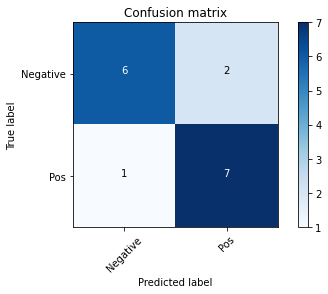

In [58]:
# Compute confusion matrix
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Pos'],normalize= False,  title='Confusion matrix')

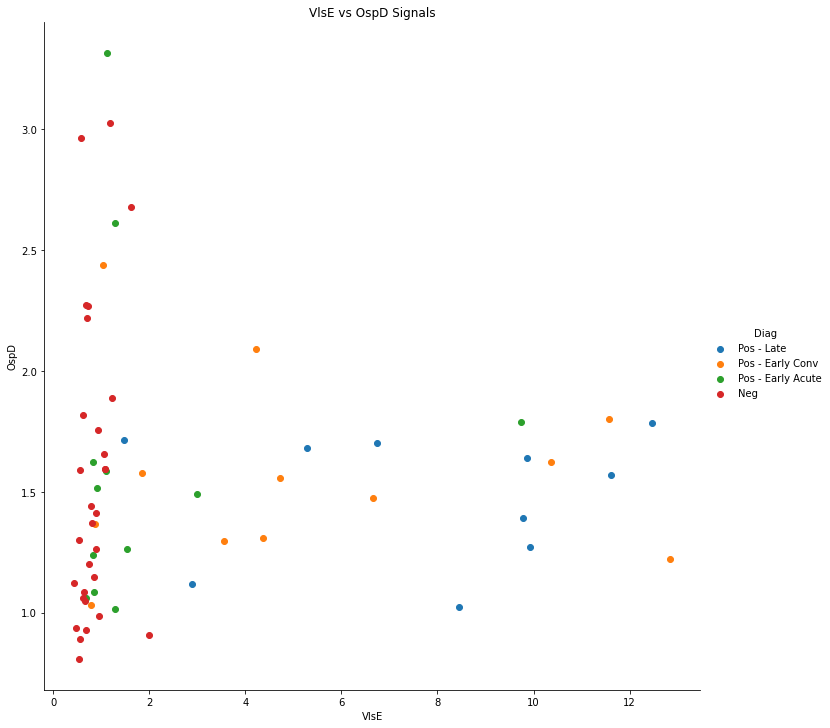

In [59]:
import seaborn as sns
#this code also uses seaborn and produces a single pair plot of the VlsE and OspD columns of data, 
#and uses 'Diag' column categories to determine color per sample category
sns.FacetGrid(df, hue='Diag', height=10).map(plt.scatter, 'VlsE', 'OspD').add_legend().set(
    title='VlsE vs OspD Signals',
    xlabel='VlsE',
    ylabel='OspD'
)

In [60]:
from sklearn import metrics 
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0

count = 100
if model.penalty == 'none':
    new_model = LogisticRegression(penalty=model.penalty, solver=model.solver, max_iter=model.max_iter)
else:
    new_model = LogisticRegression(penalty=model.penalty, C=model.C, solver=model.solver, max_iter=model.max_iter)
for n in range(1, count+1):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, stratify=y) 

    new_model.fit(X_tr, y_tr)
    yh = new_model.predict(X_te)
    cr = classification_report(y_te, yh, output_dict=True)
    
    curr_accuracy = metrics.accuracy_score(y_te,yh)
    curr_sensitivity = cr["Pos"]["recall"]
    curr_specificity = cr["Neg"]["recall"]
    print("Run: %d" % (n))
    print(' Accuracy: %.3f ' % (curr_accuracy))
    print(' Sensitivity: %.3f ' % (curr_sensitivity))
    print(' Specificity: %.3f ' % (curr_specificity))
    
    sensitivity_sum = sensitivity_sum + curr_sensitivity
    specificity_sum = specificity_sum + curr_specificity
    accuracy_sum = accuracy_sum + curr_accuracy

average_accuracy = accuracy_sum/count
average_sensitivity = sensitivity_sum/count
average_specificity = specificity_sum/count
print('')
print('Average Accuracy: %.3f ' % (average_accuracy))
print('Average Sensitivity: %.3f ' % (average_sensitivity))
print('Average Specificity: %.3f ' % (average_specificity))



Run: 1
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 2
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 3
 Accuracy: 0.938 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 4
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 5
 Accuracy: 0.938 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 6
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 0.625 
Run: 7
 Accuracy: 0.938 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 8
 Accuracy: 0.875 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 9
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 10
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 0.714 
Run: 11
 Accuracy: 1.000 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 12
 Accuracy: 0.938 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 13
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 14
 Accuracy: 0.938 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 15
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specifici